# Body Fat Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bodyfat.csv')

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
df.tail()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8
251,1.0271,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9


The features are usually all columns except the label(s) in a dataset and as the problem statement we are tackling is of Body Fat Prediction the target feature or label of this dataset will be the Body Fat of an individual

In [5]:
# Exploring features and labels of the dataset

features = df.columns.tolist()
label = 'BodyFat'
features.remove(label)
print('Features:', features)
print('Label:',label)

Features: ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
Label: BodyFat


In [6]:
# Exploring the size and shape of the dataset

df.shape

(252, 15)

In [7]:
# Datatype of features and labels

print("Data types of features:")
print(df[features].dtypes)
print("\nData type of label:")
print("BodyFat   ", df[label].dtype)

Data types of features:
Density    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

Data type of label:
BodyFat    float64


There's no need to perform datatype conversion for the features or the label.

In [8]:
# Exploring Statistical Summary of the dataset

df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


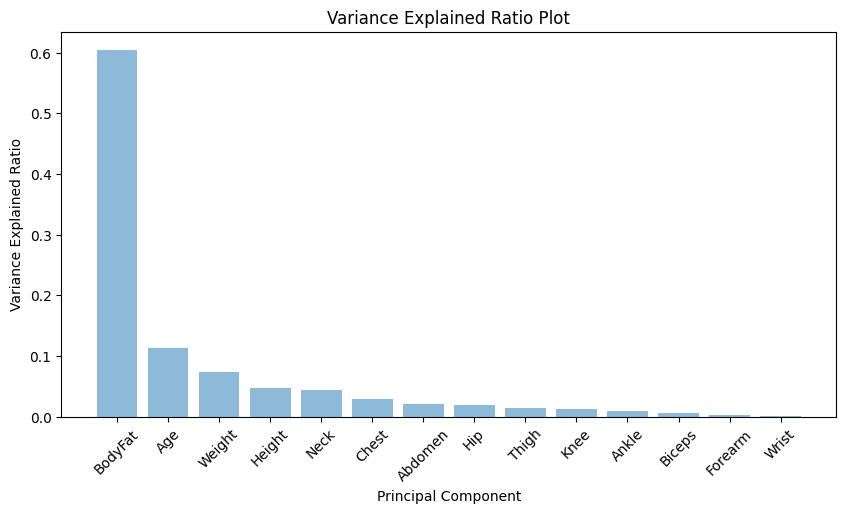

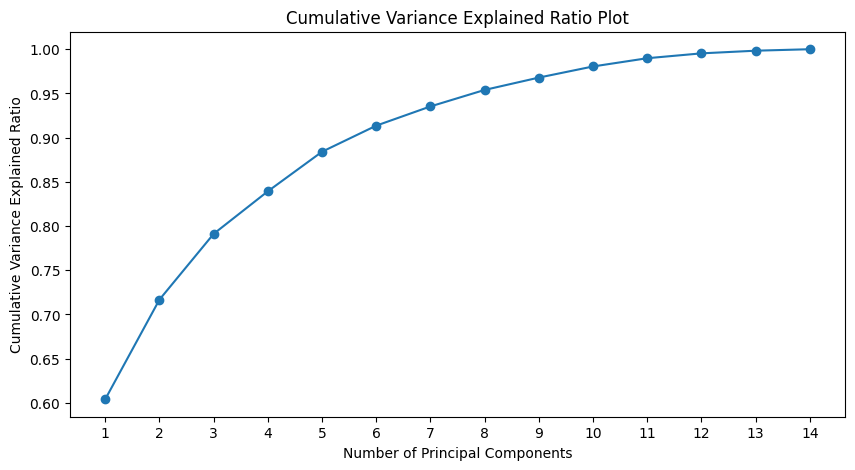

    Feature  Variance Ratio
0   BodyFat        0.604145
1       Age        0.112657
2    Weight        0.074375
3    Height        0.048138
4      Neck        0.044746
5     Chest        0.029498
6   Abdomen        0.021736
7       Hip        0.018654
8     Thigh        0.013966
9      Knee        0.012582
10    Ankle        0.009325
11   Biceps        0.005498
12  Forearm        0.003007
13    Wrist        0.001674

The 'Density' column is determined from underwater weighing and is not an independent feature. 
Including it in the analysis could lead to data leakage or bias in the results.
Therefore, it was dropped from the analysis to ensure the independence of the features.



In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# # Load the dataset 
# data = pd.read_csv(r"D:\Mehek\bodyfat.csv")

# Extract features
features = df.drop(['Density'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Variance explained ratio plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained Ratio Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1), features.columns, rotation=45)
plt.show()

# Cumulative variance explained ratio plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained Ratio')
plt.title('Cumulative Variance Explained Ratio Plot')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.show()

# List up the features with their ratio
features_ratios = pd.DataFrame({'Feature': features.columns, 'Variance Ratio': pca.explained_variance_ratio_})
print(features_ratios)

# Explanation for dropping the 'Density' column
explanation = """
The 'Density' column is determined from underwater weighing and is not an independent feature. 
Including it in the analysis could lead to data leakage or bias in the results.
Therefore, it was dropped from the analysis to ensure the independence of the features.
"""
print(explanation)